In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd

In [2]:
# timestamps = np.array([0, 10, 30, 60, 120, 180])

# # values in the list are in mmol/L
# # 1 mmol/L = 18.016 mg/dL
# healthy_vals = np.array([0.33, 0.5, 1, 1.055, 0.74, 0.73]) * 18.016
# cirrhosis_vals = np.array([0.33, 1, 2.525, 2.465, 1.665, 1.345]) * 18.016

In [4]:
df = pd.read_csv(r"C:\Users\mihir\OneDrive\Programs\Capstone\neural_net\images\animation\plot-data.csv")
timestamps = df['normalized_time'].to_numpy()
healthy_vals = df['healthy'].astype('float').to_numpy() * 18.016
cirrhosis_vals = df['disease'].astype('float').to_numpy() * 18.016
df

,time,disease,healthy,normalized_time
0,27.590551,0.316854,0.316854,0.000000
1,35.527559,0.970787,0.444944,7.937008
2,43.842520,1.894382,0.862921,16.251969
3,52.535433,2.487640,1.065169,24.944882
4,61.606299,2.656180,1.038202,34.015748
5,70.677165,2.561798,1.024719,43.086614
6,78.614173,2.440449,1.024719,51.023622
7,88.440945,2.305618,0.964045,60.850394
8,96.755906,1.995506,0.984270,69.165354
9,105.826772,1.800000,0.889888,78.236221


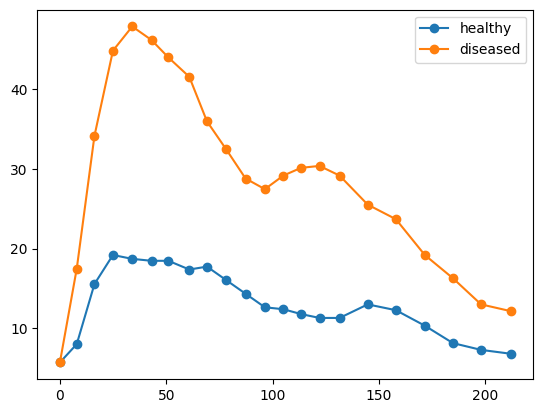

In [5]:
plt.plot(timestamps, healthy_vals, '-o', label="healthy")
plt.plot(timestamps, cirrhosis_vals, '-o', label="diseased")
plt.legend()

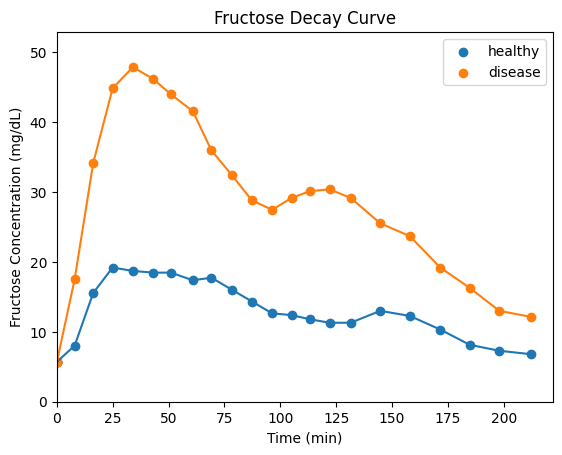

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Define the initial plots with empty data
xdata1, ydata1 = [], []
scatter1 = ax.scatter(xdata1, ydata1, color='#1f77b4', label="healthy")

xdata2, ydata2 = [], []
scatter2 = ax.scatter(xdata2, ydata2, color='#ff7f0e', label="disease")

line1, = ax.plot([], [], color='#1f77b4')
line2, = ax.plot([], [], color='#ff7f0e')

ax.set_xlabel('Time (min)')
ax.set_ylabel('Fructose Concentration (mg/dL)')
ax.set_title('Fructose Decay Curve')
ax.legend(loc='upper right')

# Define the update function
def update(frame, timestamps, data1, data2):
    # check if this is a regular frame or a pause frame
    if frame < len(timestamps):

        # Add a new pair of data points to the first set
        x_new1 = timestamps[frame]
        y_new1 = data1[frame]
        xdata1.append(x_new1)
        ydata1.append(y_new1)
        
        # Update the scatter plot for the first set
        scatter1.set_offsets(np.c_[xdata1,ydata1])
        line1.set_data(xdata1, ydata1)
        
        # Add a new pair of data points to the second set
        x_new2 = timestamps[frame]
        y_new2 = data2[frame]
        xdata2.append(x_new2)
        ydata2.append(y_new2)
        
        # Update the scatter plot for the second set
        scatter2.set_offsets(np.c_[xdata2,ydata2])
        line2.set_data(xdata2, ydata2)
        
        # Set the axis limits
        ax.set_xlim([0, max(timestamps[-1], timestamps[-1])+10])
        ax.set_ylim([0, max(max(data1), max(data2))+5])
        
        # Return the scatter plot objects
        return scatter1, scatter2
    else:
        return []

# # Define the data
# timestamps = np.array([0, 10, 30, 6   0, 120, 180])
# healthy_vals = np.array([0.33, 0.5, 1, 1.055, 0.74, 0.73]) * 18.016
# cirrhosis_vals = np.array([0.33, 1, 2.525, 2.465, 1.665, 1.345]) * 18.016

# Set the animation interval to 650 milliseconds
interval = 650

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=len(timestamps)+10, fargs=(timestamps, healthy_vals, cirrhosis_vals), interval=interval, blit=True)

# Save the animation to a GIF file
anim.save('animation.gif', writer='pillow', dpi=300)

# Show the animation
plt.show()
